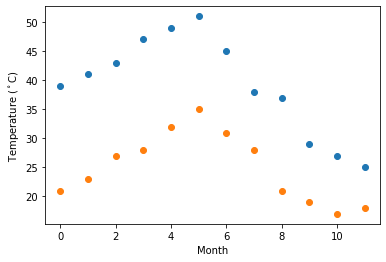

In [1]:
import matplotlib.pyplot as plt
import numpy as np
max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
month = np.arange(12)

plt.scatter(month,max)
plt.scatter(month,min)
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.show()

In [2]:
#https://scipy-lectures.org/intro/scipy/auto_examples/solutions/plot_curvefit_temperature_data.html

from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps,month,max)
res_min, cov_min = optimize.curve_fit(yearly_temps,month,min)

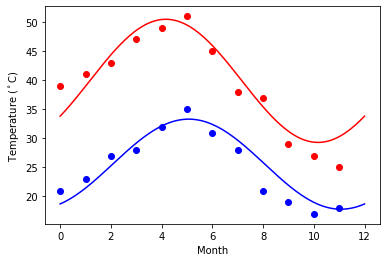

In [3]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(month, max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(month, min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [4]:
import pandas as pd
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'

In [5]:
df = pd.read_csv(url)
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.drop(df.tail(1).index,inplace=True)

In [7]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [8]:
sex = [df.sex.value_counts()['male'],df.sex.value_counts()['female']]
sex

[843, 466]

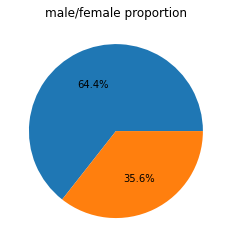

In [9]:
plt.title("male/female proportion")
plt.pie(sex,autopct='%.1f%%')
plt.show()

<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/matplotlib/ticker.py:586: UserWarning: Warning: converting a masked element to nan.
  s = self.format % xp


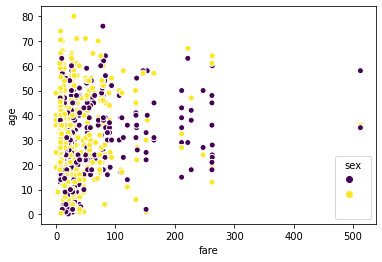

In [10]:
scatter = plt.scatter(df['fare'],df['age'],c=df['sex'].map({'female':0,'male':1}),edgecolors='white')
plt.xlabel('fare')
plt.ylabel('age')
plt.scatter
plt.legend(handles = scatter.legend_elements()[0], title="sex")
plt.show()